In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import sweetviz as sv

In [3]:
Odata = pd.read_csv("Toyotacorolla.csv",encoding="latin1")
Odata.shape

(1436, 38)

In [4]:
Odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data=Odata.iloc[:,[2,3,6,8,12,13,15,16,17]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data=data.rename({"Age_08_04":"Age","Quarterly_Tax":"QT"},axis=1)
data

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data.isna()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [8]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


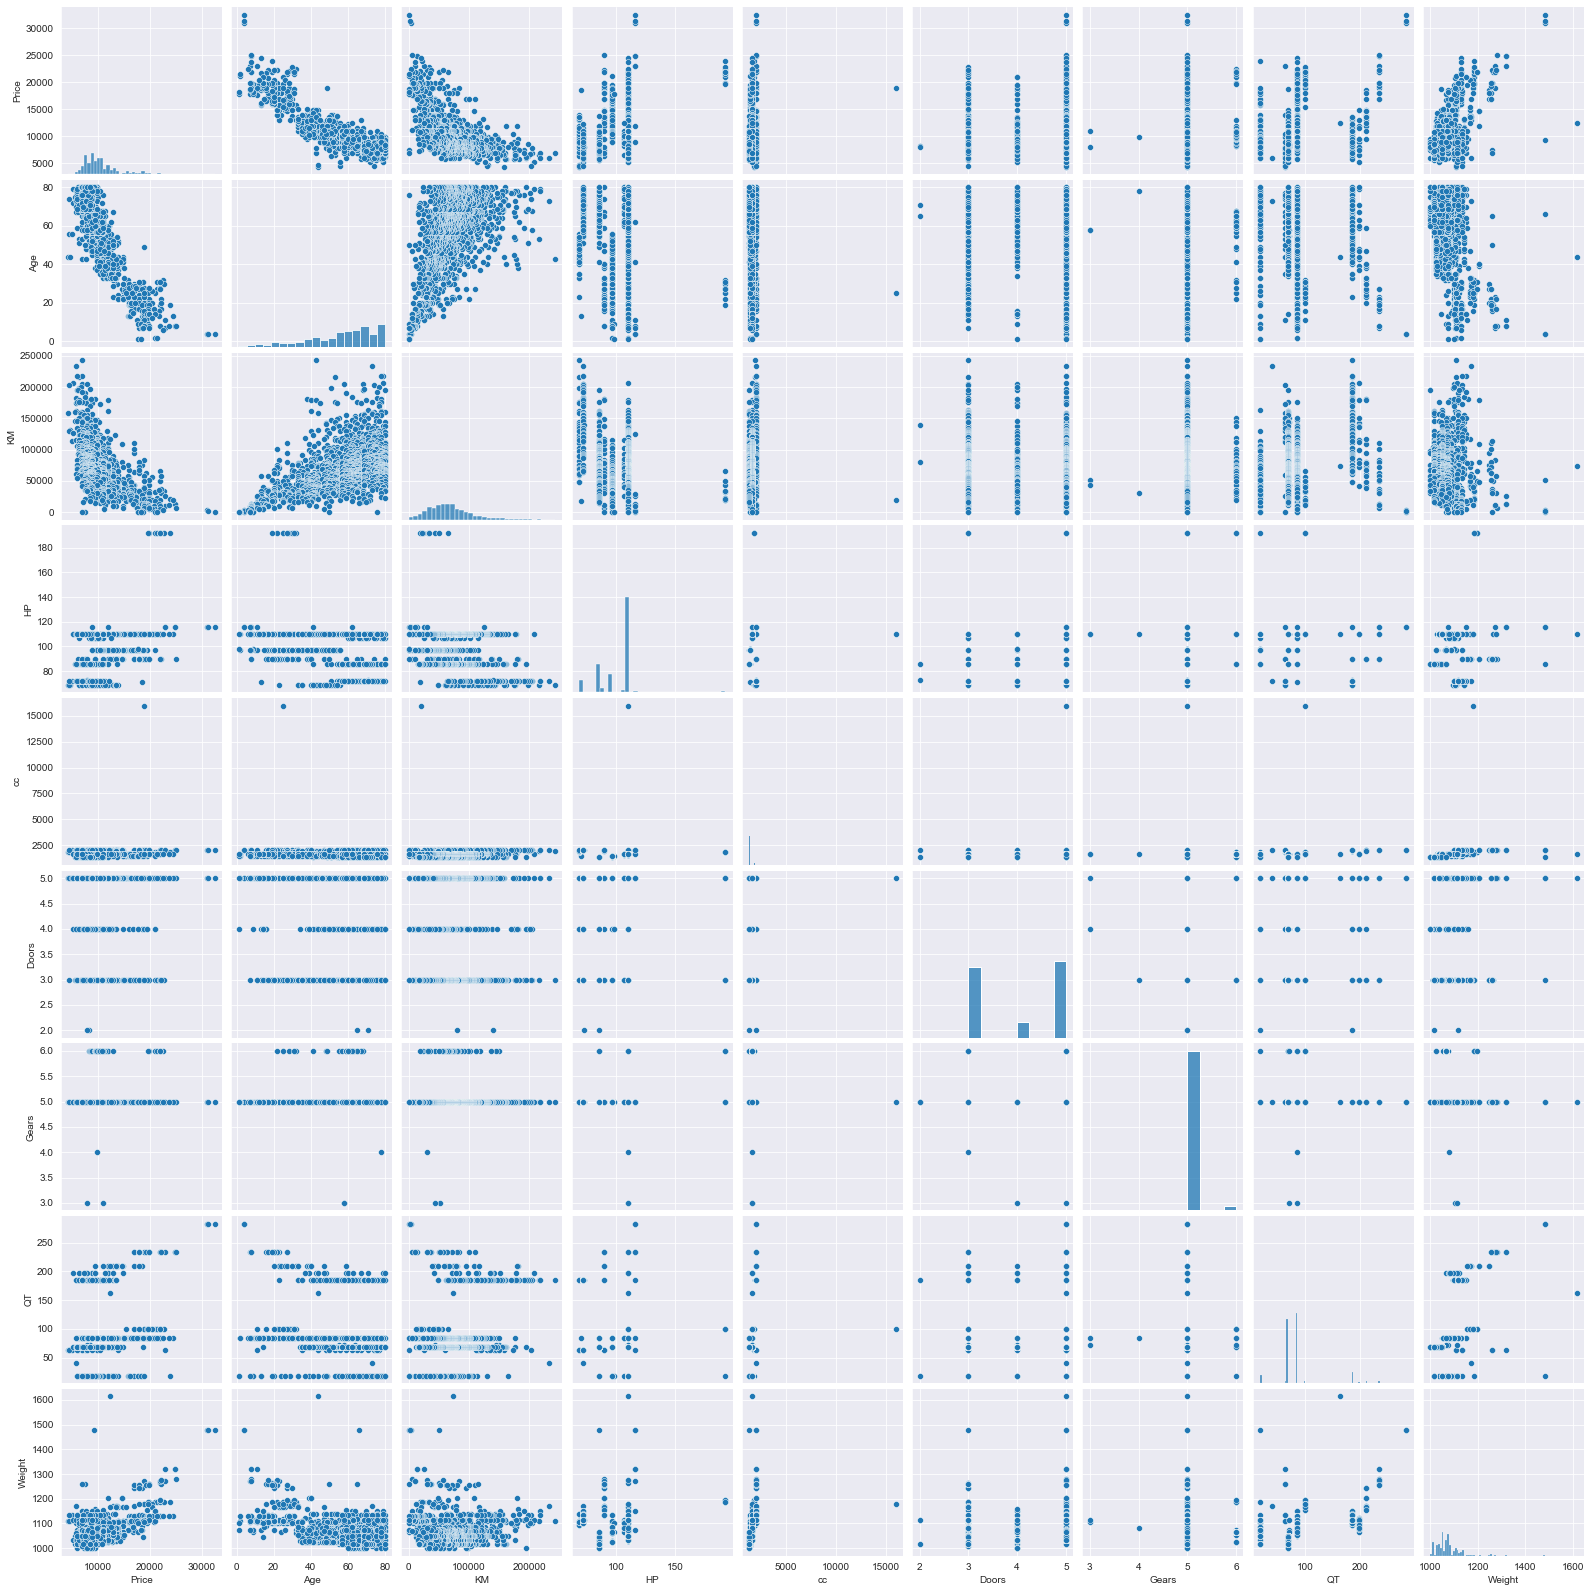

In [9]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [10]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:51:12   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#here p_value is greater than significance value(0.05) so we have rebuild our model

In [12]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [35]:
sweet_report=sv.analyze(data)
sweet_report.show_html("data.html")

                                             |                                             | [  0%]   00:00 ->…

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
data1=data.drop_duplicates().reset_index(drop = True)
data1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [14]:
model1=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight",data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:51:12   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model_doors =smf.ols("Price~Doors",data=data).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           1.46e-12
Time:                        13:51:12   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model_cc=smf.ols("Price~cc",data=data).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           1.55e-06
Time:                        13:51:12   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model3=smf.ols("Price~cc+Doors",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           1.15e-15
Time:                        13:51:12   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# calculating Vif

In [24]:
vif_Age=smf.ols("Age~KM+HP+cc+Doors+Gears+QT+Weight",data=data).fit().rsquared


In [26]:
vif_age_rsq=1/(1-vif_Age)
vif_age_rsq

1.8846198056602865

In [27]:
vif_km=smf.ols("KM~Age+HP+cc+Doors+Gears+QT+Weight",data=data).fit().rsquared
vif_km_rsq=1/(1-vif_km)
vif_km_rsq


1.7569047782042881

In [28]:
vif_hp=smf.ols("HP~KM+Age+cc+Doors+Gears+QT+Weight",data=data).fit().rsquared
vif_hp_rsq=1/(1-vif_hp)
vif_hp_rsq

1.4194221086310979

In [29]:
vif_cc=smf.ols("cc~KM+HP+Age+Doors+Gears+QT+Weight",data=data).fit().rsquared
vif_cc_rsq=1/(1-vif_cc)
vif_cc_rsq

1.1638939849423795

In [30]:
vif_doors=smf.ols("Doors~KM+HP+cc+Age+Gears+QT+Weight",data=data).fit().rsquared
vif_doors_rsq=1/(1-vif_doors)
vif_doors_rsq

1.1565752070760438

In [31]:
vif_gears=smf.ols("Gears~KM+HP+cc+Doors+Age+QT+Weight",data=data).fit().rsquared
vif_gears_rsq=1/(1-vif_gears)
vif_gears_rsq

1.0987230193470365

In [32]:
vif_qt=smf.ols("QT~KM+HP+cc+Doors+Gears+Age+Weight",data=data).fit().rsquared
vif_qt_rsq=1/(1-vif_qt)
vif_qt_rsq

2.311430811531038

In [34]:
vif_weight=smf.ols("Weight~KM+HP+cc+Doors+Gears+QT+Age",data=data).fit().rsquared
vif_weight_rsq=1/(1-vif_weight)
vif_weight_rsq

2.516419837445868

In [41]:
vif_table={"Name":["vif_age","vif_km","vif_hp","vif_cc","vif_doors","vif_gears","vif_qt","vif_weight"],"vif_value":[vif_age_rsq,vif_km_rsq,vif_hp_rsq,vif_cc_rsq,vif_doors_rsq,vif_gears_rsq,vif_qt_rsq,vif_weight_rsq]}
vif = pd.DataFrame(vif_table)
vif

,Name,vif_value
0,vif_age,1.884620
1,vif_km,1.756905
2,vif_hp,1.419422
3,vif_cc,1.163894
4,vif_doors,1.156575
5,vif_gears,1.098723
6,vif_qt,2.311431
7,vif_weight,2.516420


In [ ]:
# here, no value is greater than 10, this means that there is no collinearity prblm.

# model validation 

In [43]:
errors = model.resid
errors

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

In [44]:
errors.mean()

2.733252618974529e-09

In [ ]:
# here mean of all the errors is equal to zero so price is an independent variable

C:\Sunil\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


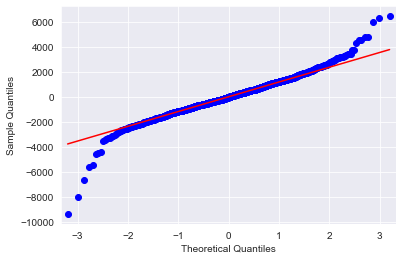

In [49]:
import statsmodels.api as sm 
qqplot = sm.qqplot(errors,line="q")

In [50]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [51]:
list(np.where(model.resid<-5000))

[array([191, 192, 221, 601, 960], dtype=int64)]

# residual plots for homoscedasticity

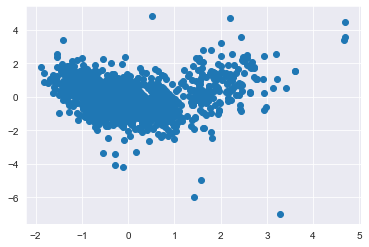

In [61]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

# residual vs regressor plot

<function matplotlib.pyplot.show(close=None, block=None)>

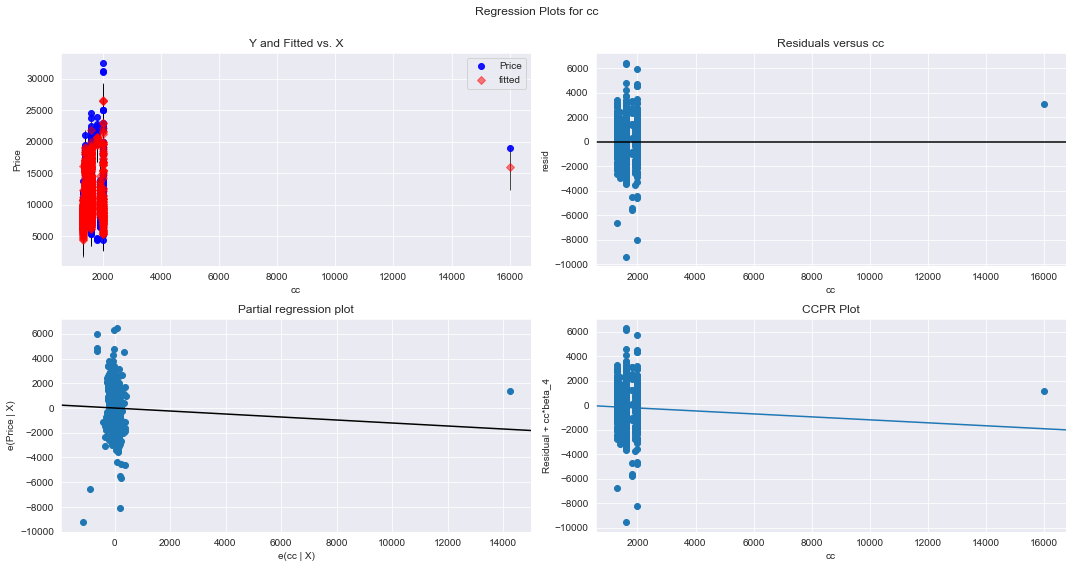

In [68]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

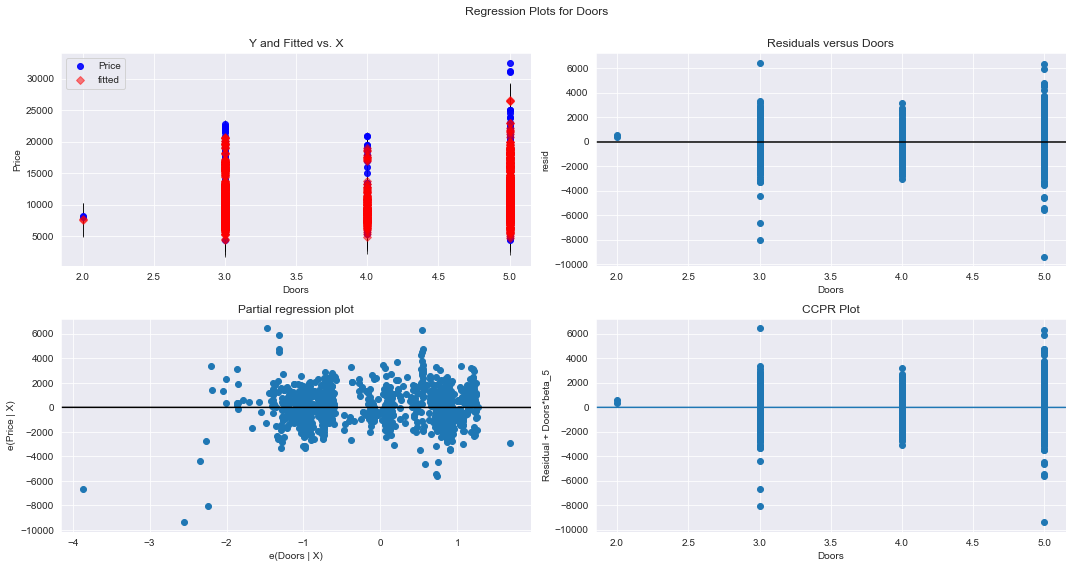

In [70]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show

# cooks distance

In [74]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
(c,_)

(array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
        8.44762355e-07, 6.97878368e-04, 1.08627724e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

<function matplotlib.pyplot.show(close=None, block=None)>

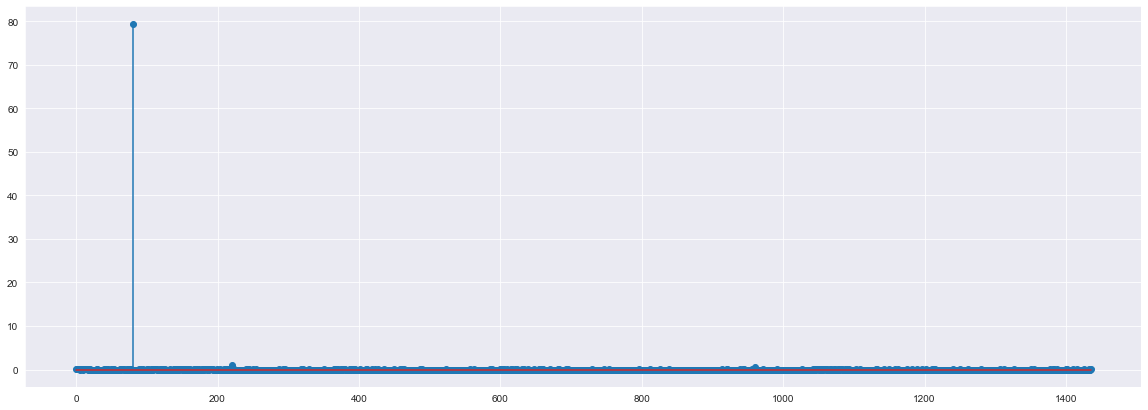

In [75]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,4))
plt.show

In [76]:
np.argmax(c),np.max(c)

(80, 79.52010624138055)

<function matplotlib.pyplot.show(close=None, block=None)>

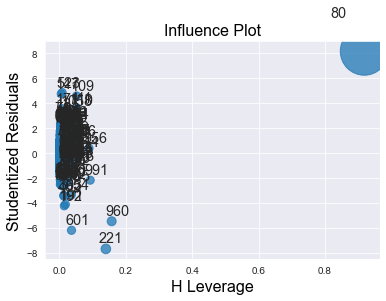

In [77]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show

In [79]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [80]:
data[data.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [83]:
np.argmax(leverage_cutoff),np.max(leverage_cutoff)

(0, 0.020891364902506964)

In [87]:
data_new = data.drop(data.index[[80]],axis=0).reset_index()
data_new

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [100]:
new_model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight",data=data_new).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:33:05   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
new_model_influence=new_model.get_influence()
(c_,_) = new_model_influence.cooks_distance
(c_,_)

(array([6.76188181e-03, 3.63236662e-03, 4.92319660e-03, ...,
        3.63997681e-06, 9.09665729e-04, 9.71186915e-03]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999999]))

<function matplotlib.pyplot.show(close=None, block=None)>

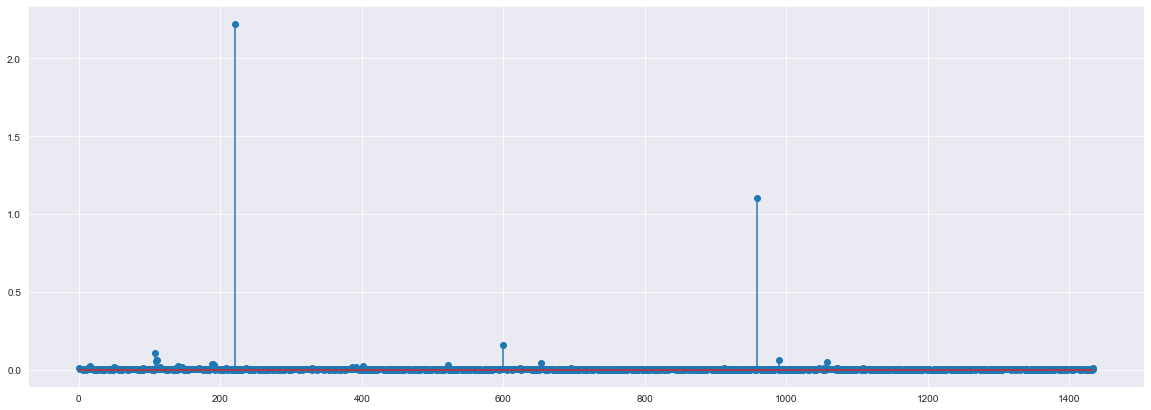

In [108]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_new)),np.round(c_,4))
plt.show

In [109]:
np.argmax(c_),np.max(c_)

(220, 2.2244611713001508)

<function matplotlib.pyplot.show(close=None, block=None)>

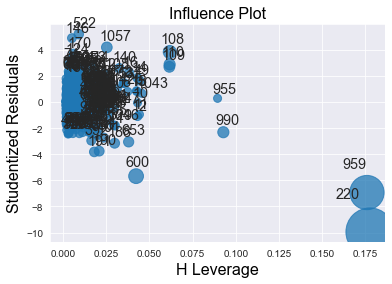

In [110]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(new_model)
plt.show

In [111]:
k=data_new.shape[1]
n=data_new.shape[0]
leverage_cut = 3*((k+1)/n)
leverage_cut

0.022996515679442508

In [113]:
data_f = data_new.drop(data_new.index[[220,959]],axis=0).reset_index()
data_f

,level_0,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1428,1430,1431,7500,69,20544,86,1300,3,5,69,1025
1429,1431,1432,10845,72,19000,86,1300,3,5,69,1015
1430,1432,1433,8500,71,17016,86,1300,3,5,69,1015
1431,1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [115]:
final_model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight",data=data_f).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:48:57   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age         -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM            -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP            36.6084      2.745     13.334      0.000      31.223      41.994
cc            -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors       -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears        464.9839    180.976      2.569      0.010     109.975     819.993
QT             5.2134      1.371      3.802      0.000       2.523       7.904
Weight        30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model predication

In [135]:
extra_data = pd.DataFrame({"Age":40,"KM":10000,"HP":200,"cc":100,"Doors":4,"Gears":4,"QT":300,"Weight":1000},index=[0])
extra_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,40,10000,200,100,4,4,300,1000


In [136]:
final_model.predict(extra_data)

0    21121.767495
dtype: float64

In [137]:
pred_price=final_model.predict(data)
pred_price

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1431     9115.435074
1432     8499.218117
1433     8644.947302
1434     8758.664462
1435    10641.521002
Length: 1436, dtype: float64